In [51]:
import math as mt
from sympy import *

x = Symbol('x')  #La libreria sympy usa este símbolo como variable para las funciones, es posible usar mas variables
e = mt.e
funcion = x**3 + 4*x**2 - 10
#funcion = (x*e**x) - (x**2) - (5*x) - 3
#funcion = (e**(3*x-12))+(x*cos(3*x))-(x**2)+4#Se define la funcion que se usará en los métodos númericos
tolerancia = 10**-8  #Tolerancia , indica cuando el valor encontrado es considerado por el usuario lo suficientemente cercano a cero como para ser una raíz
    
def  biseccionP():
        x = Symbol('x')
        e = mt.e
        funcion = (e**(3*x-12))+(x*cos(3*x))-(x**2)+4
        niter = int(input("Ingrese numero de iteraciones: "))
        Xi = float(input("Limite A del intervalo: "))
        Xs = float(input("Limite B del intervalo: "))
        tolerancia = (0.5)*10**(-3)
        fxi = funcion.evalf(subs = {x : Xi})
        fxs = funcion.evalf(subs = {x : Xs})
        Xm = 0.0
        fxm = 0.0
        Xaux = 0.0
        error = 0.0
        
        if(fxi == 0):
            print(Xi, " Es la raiz")
        elif(fxs == 0):
            print(Xs, " Es la raiz")
        elif(fxi * fxs < 0):
            Xm = ((Xi + Xs)/2)
            fxm = funcion.evalf(subs = {x : Xm})
            contador = 1
            error = tolerancia + 1
            while((error>tolerancia) and fxm != 0 and contador < niter):
                if(fxi * fxm < 0):
                    Xs = Xm
                    fxs = fxm
                else:
                    Xi = Xm
                    fxi = fxm
                Xaux = Xm
                Xm = ((Xi + Xs)/2)
                fxm = funcion.evalf(subs = {x : Xm})
                error = mt.fabs(Xm - Xaux)
                contador = contador + 1
            if(fxm == 0):
                print (Xm, " Es raiz")
            elif(error < tolerancia):
                print(Xm, " Es una aproximacion de una raiz con una tolerancia de ", tolerancia, "Y un error de ", error, "y ", contador, " iteraciones")
            else:
                print("Fracaso el numero de iteraciones ")
        else:
            print("El intervalo es inadecuado")
    
    
        
#biseccionP()    
        
        

#  Metodo Iterativo

### Metodo iterativo que encuentra  , en el mejor de los casos la raíz de una función cercana a un valor inicial dado, en los demás casos entrega el intervalo [A - B] donde se encuentra una raíz de la función.

In [52]:
def metodoIterativo():
    inicial = float(input("Inserte el valor inicial: "))  #Se ingresa un valor inicial con el objetivo de encontrar la raiz de la funcion mas cercana a este valor
    delta = float(input("Inserte el valor de delta: "))   #El valor de delta indica cuanto se avanzará en el eje X , para encontrar la raíz
    nMax = int(input("Inserte numero maximo de iteraciones")) #El número máximo de iteraciones que se ejecutará el algoritmo

    
    contador = 0 #Inicializa la variable contador
    bandera  = False # Bandera, después indicará si el algoritmo terminó por converger , o porque llegó al número máximo de iteraciones
    FXant = 0.0 #Xanterior , valor evaluado en la funcion antes de moverme "delta" unidades
    FXact = 0.0 #Xactual, valor evaluado en la funcion despues de moverme "delta" unidades
    
    while(contador < nMax):
        FXant = funcion.evalf(subs = { x : inicial}) #Se evalua la funcion en el valor inicial, y es el valor de la funcion Xant
        if(mt.fabs(FXant) <= tolerancia):                    #Se compara si el valor ya es mas pequeño a la tolerancia, es decir si se considera una raíz
            bandera = True                           #Indica que se encontró un valor considerado como una raíz 
            break
            
        inicial = inicial + delta      #El valor inicial , se mueve "delta" unidades
        FXact = funcion.evalf(subs = { x : inicial }) #se evalua la función en el nuevo valor inicial
        if(FXant * FXact < 0):               # Si al multiplicar la función evaluada en el punto anterior por la funcion evaluada en el punto actual, y esto da menor a cero, significa que entre ambos valor hay una raíz
            break                     
        
        contador += 1
        
    if(contador == nMax - 1):
        print("No hay una raíz")
    elif(bandera):
        print("El valor exacto de la raíz es:  ", inicial)
    else:
        print("Hay una raíz entre " , "[",inicial - delta ,",", inicial ,"]")  #Muestra el intervalo en el que se encuentra una raíz

#NOTA : ¿Que pasaría si el algoritmo encuentra el solución en la última iteración?

#metodoIterativo()

# Metodo de bisección

### El método de bisección es un algoritmo de búsqueda de raíces que trabaja dividiendo el intervalo a la mitad y seleccionando el subintervalo que tiene la raíz.



In [53]:

def biseccion(): 
    numIteraciones = int(input("Ingrese numero de iteraciones: "))
    limA = float(input("Limite A del intervalo: "))
    limB = float(input("Limite B del intervalo: "))
    funcionEvaluadaEnLimA = 0.0
    funcionEvaluadaEnLimB = 0.0
    ptoMedio = 0.0
    i = 1
    error = 1
    
    anterior = ((limA + limB) / 2)
    funcionEvaluadaEnPtoMedio = funcion.evalf(subs = {x : anterior})
    
    while(i < numIteraciones):
        funcionEvaluadaEnLimA = funcion.evalf(subs = { x : limA})
        funcionEvaluadaEnLimB = funcion.evalf(subs = { x : limB})
        if(error<= tolerancia):
            break
        if(funcionEvaluadaEnLimA * funcionEvaluadaEnPtoMedio > 0):
            limA = anterior
        else:
            limB = anterior
        funcionEvaluadaEnAnterior = funcion.evalf(subs = {x : anterior})
        ptoMedio = ((limA + limB)/2)
        funcionEvaluadaEnPtoMedio = funcion.evalf(subs = {x : ptoMedio})
        error = mt.fabs(anterior - ptoMedio)
        anterior = ptoMedio
        i = i + 1
    
    
    print("Con " , i , "iteraciones el punto medio es :", ptoMedio, "\nUn error de ", error, "\ny una tolerancia de ", tolerancia)

#biseccion

# Metodo de regla falsa

### Como en el método de bisección, se parte de un intervalo inicial [a0,b0] con f(a0) y f(b0) de signos opuestos, lo que garantiza que en su interior hay al menos una raíz (véase Teorema de Bolzano). El algoritmo va obteniendo sucesivamente en cada paso un intervalo más pequeño [ak, bk] que sigue incluyendo una raíz de la función f.

### A partir de un intervalo [ak, bk] se calcula un punto interior ck:

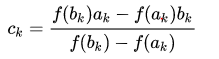

### Dicho punto es la intersección de la recta que pasa por (a,f(ak)) y (b,f(bk)) con el eje de abscisas (igual a como se hace en el método de la secante).

### Se evalúa entonces f(ck). Si es suficientemente pequeño, ck es la raíz buscada. Si no, el próximo intervalo [ak+1, bk+1] será:

### [ak, ck] si f(ak) y f(ck) tienen signos opuestos;
### [ck, bk] en caso contrario.

In [54]:
def reglaFalsa():
        niter = int(input("Ingrese numero de iteraciones: "))
        Xi = float(input("Limite A del intervalo: "))
        Xs = float(input("Limite B del intervalo: "))
        fxi = funcion.evalf(subs = {x : Xi})
        fxs = funcion.evalf(subs = {x : Xs})
        Xm = 0.0
        fxm = 0.0
        Xaux = 0.0
        error = 0.0
        
        if(fxi == 0):
            print(Xi, " Es la raiz")
        elif(fxs == 0):
            print(Xs, " Es la raiz")
        elif(fxi * fxs < 0):
            Xm = recta(Xi,Xs,fxi,fxs)
            fxm = funcion.evalf(subs = {x : Xm})
            contador = 1
            error = tolerancia + 1
            while((error>tolerancia) and fxm != 0 and contador < niter):
                if(fxi * fxm < 0):
                    Xs = Xm
                    fxs = fxm
                else:
                    Xi = Xm
                    fxi = fxm
                Xaux = Xm
                Xm = recta(Xi,Xs,fxi,fxs)
                fxm = funcion.evalf(subs = {x : Xm})
                error = mt.fabs(Xm - Xaux)
                contador = contador + 1
            if(fxm == 0):
                print (Xm, " Es raiz")
            elif(error < tolerancia):
                print(Xm, " Es una aproximacion de una raiz con una tolerancia de ", tolerancia, "Y un error de ", error, "y ", contador, " iteraciones")
            else:
                print("Fracaso el numero de iteraciones ")
        else:
            print("El intervalo es inadecuado")
            
def recta(a,b,fa,fb):
    return a - ((fa*(b-a))/(fb-fa))

#reglaFalsa()

# Metodo de punto fijo

### A partir de la ecuacion f(x) = 0 , generamos la ecuacion x = g(x) , a la cual le buscamos su solución. Para resolver la ecuacion x = g(x), buscamos un valor de x que al reemplazarlo en g el resultado sea el mismo x, es decir buscamos un x que permanezca invariante para la funcion g.

In [55]:
def puntoFijo():
    
    nMax = int(input("Ingrese el máximo número de iteraciones: "))
    inicial = float(input("Ingrese el numero inicial para el metodo: "))
    #funcionEquivalente = ((x*(e**x) - (x**2) - 3 )/ 5)
    #funcionEquivalente =  ((10/(x+4)))**(1/2)
    funcionEquivalente = x - ((x**3 + 4*x**2 - 10 ) / (3*x**2 + 8*x) )
    i = 0
    error = tolerancia + 1
    funcionEvaluadaActual = 1.0
    
    print("X_n                    " , "f(X_n)                    ", "error")
    print(inicial,"                 " ,funcion.evalf(subs = {x : inicial}))
    while(i < nMax and error > tolerancia and funcionEvaluadaActual != 0):
        funcionEvaluadaActual = funcionEquivalente.evalf(subs = {x : inicial})
        actual =  inicial
        inicial = funcionEvaluadaActual
        error = mt.fabs(((inicial - actual ) / inicial))
        funcionRealParaRaiz = funcion.evalf(subs = {x : inicial})
        print(funcionEvaluadaActual," | " ,funcionRealParaRaiz, " | " ,error)
        i = i +1
        
    print("")
    if(funcionEvaluadaActual == 0):
        print(actual , " Es una raiz", "con" , i+1 , "iteraciones")
    elif(error < tolerancia):
        print(actual, " Es una aproximacion con una tolerancia de ", tolerancia, "con" , i+1 , "iteraciones")
    else:
        print("El metodo fracasó con ", nMax , " iteraciones")
            

puntoFijo()
        
        
    
    

Ingrese el máximo número de iteraciones: 20
Ingrese el numero inicial para el metodo: 1.5
X_n                     f(X_n)                     error
1.5                   2.37500000000000
1.37333333333333  |  0.134345481481481  |  0.09223300970873789
1.36526201487463  |  0.000528461179515671  |  0.005911919009515456
1.36523001391615  |  8.29054833008246e-9  |  2.3439975794408214e-05
1.36523001341410  |  6.96088026123474e-16  |  3.677400366131333e-10

1.36523001391615  Es una aproximacion con una tolerancia de  1e-08 con 5 iteraciones
